# Which is the Best International Football team ?
Hi !
From this question, I have decided to explore some datasets and try to find some interesting statistics/rankings for the best (and worst) international teams: 
* [**International football results from 1872 to 2019**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017), by *Mart Jürisoo*
* [**FIFA Soccer Rankings**](https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now), by *Tadhg Fitzgerald*
* [**Country Code**](https://www.kaggle.com/koki25ando/country-code), by *Koki Ando*

As a reminder, the current FIFA World Champion is **France**, and the country which has most won this trophy is **Brazil**.

I'm a football fan but I will try to give observations and comments as impartial as possible. 

This kernel was originally posted on [Kaggle](https://www.kaggle.com/igormacgregor/which-is-the-best-international-football-team?scriptVersionId=41363422)

### Table of Contents
1. [Data Preprocessing](#data-preprocessing)
2. [Ranking 0 - Official FIFA Ranking](#ranking-0)
3. [Ranking I - Unofficial World Champion](#ranking-1)
4. [Ranking II - *Joga Bonito* Champion](#ranking-2)
5. [Ranking III - ELO Ranking](#ranking-3)
6. [Some interesting facts](#facts)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px

from datetime import datetime

## Data Preprocessing
<a id = '#data-preprocessing'></a>

In [2]:
code_df = pd.read_csv('../input/country-code/country_code.csv',  usecols=['Country_name', 'code_3digit'])
code_df.head()

,Country_name,code_3digit
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [3]:
games = pd.read_csv('../input/international-football-results-from-1872-to-2017/results.csv')
games.isnull().sum().sum()
#Nice

0

In [4]:
games['Winner'] = np.where((games['home_score'] > games['away_score']), games['home_team'], np.where((games['home_score'] < games['away_score']), games['away_team'], 'Draw'))
games['Loser'] = np.where((games['home_score'] > games['away_score']), games['away_team'], np.where((games['home_score'] < games['away_score']), games['home_team'], 'Draw'))

games['Year'] = games['date'].apply(lambda date : int(date.split('-')[0]))
games['Month'] = games['date'].apply(lambda date : int(date.split('-')[1]))
games['Day'] = games['date'].apply(lambda date : int(date.split('-')[2]))
games['Date'] = games['date'].apply(lambda date : pd.to_datetime(date))

In [5]:
games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Year,Month,Day,Date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,1872,11,30,1872-11-30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,1873,3,8,1873-03-08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,1874,3,7,1874-03-07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,1875,3,6,1875-03-06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,1876,3,4,1876-03-04


## Ranking 0 - Official FIFA Ranking
<a id = '#ranking-0'></a>

This ranking is regularly criticized as biased and less accurate than ELO ratings (see ranking III), but gives us already an idea of the strength of each team.

Unfortunately, I can't find data on Kaggle for FIFA Rankings after 2018, but as of September 2019, the top 5 teams are **Belgium** (1746 points), **Brazil** (1726 points), **France** (1718 points), **England** (1652 points) and **Uruguay** (1637 points).
[Source](https://www.fifa.com/fifa-world-ranking/ranking-table/men/)

In [6]:
fifa_ranking = pd.read_csv('../input/fifa-international-soccer-mens-ranking-1993now/fifa_ranking.csv')
fifa_ranking = fifa_ranking[fifa_ranking['rank_date'] >= '2011-08-01']

In [7]:
ranking_df = pd.pivot_table(data = fifa_ranking, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
ranking_df.head()

rank_date,2011-08-24,2011-09-21,2011-10-19,2011-11-23,2011-12-21,2012-01-18,2012-02-15,2012-03-07,2012-04-11,2012-05-09,...,2017-09-14,2017-10-16,2017-11-23,2017-12-21,2018-01-18,2018-02-15,2018-03-15,2018-04-12,2018-05-17,2018-06-07
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,70.28,70.28,68.58,77.41,85.32,85.32,85.32,85.32,118.39,114.81,...,146.79,168.13,181.11,181.11,176.44,176.43,176.43,193.60,198.79,187.60
Albania,546.27,473.76,461.96,449.94,449.94,449.94,451.89,432.16,383.81,383.81,...,551.23,498.02,552.62,552.62,552.62,552.62,557.30,548.51,548.51,537.79
Algeria,612.36,604.70,713.36,757.94,757.94,734.50,683.52,709.54,666.59,666.59,...,563.85,539.54,536.76,588.29,585.30,552.13,552.93,516.47,499.15,473.83
American Samoa,0.00,0.00,0.00,0.00,60.71,60.71,60.71,60.71,60.71,60.71,...,38.25,38.25,38.25,38.25,38.25,38.25,38.25,38.25,38.25,38.25
Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,191.46,191.46,214.80,214.80,214.80,214.80,232.29,230.03,230.03,228.81


In [8]:
import plotly.express as px
best_ranks = ranking_df.loc[np.append(ranking_df.idxmax().unique(),'France')]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns, 
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))
fig.show()

Let's compare this ranking to some home-made ones !

## Ranking I - Unofficial World Champion
<a id = '#ranking-1'></a>
The First [Unofficial World Champion](https://en.wikipedia.org/wiki/Unofficial_Football_World_Championships) was England, who won a football game for the first time on the 08th of August, 1873. The team which beat it first was then Unofficial World Champion, and so on ...

In [9]:
real_world_champion = games.iloc[1]['Winner'] # Game 0 is a draw
day_one = games.iloc[1]['Date'] # Game 0 is a draw
champions = [real_world_champion]
dates = [day_one]
champions_time = {}

for i in range(len(games)):
    if games.iloc[i].Loser == real_world_champion:
        if real_world_champion in champions_time:
            champions_time[real_world_champion] += (games.loc[i, 'Date'] - dates[-1]).days
        else:
            champions_time[real_world_champion] = (games.loc[i, 'Date'] - dates[-1]).days
        real_world_champion = games.loc[i, 'Winner']
        champions.append(real_world_champion)
        dates.append(games.loc[i, 'Date'])
champions_time[real_world_champion] += (datetime.now() - dates[-1]).days
countries_df = pd.DataFrame.from_dict(champions_time, orient = 'index', columns=['Days champion'])

print(champions[0], real_world_champion)

England Ukraine


Congrats to **Ukraine** which is, as of February 2020, the Unofficial World Champion ! 

Let's see what we can learn from this ranking. Here I decided to create the '*United Kingdom*' team which is the mean of the 4 national teams (England, Northern Ireland, Scotland and Wales) results, in order to plot it on the Plotly map.

In [10]:
def return_country_code(con):
    if con in code_df['Country_name'].values:
        return code_df[code_df['Country_name'] == con]['code_3digit'].values[0]
    elif con == 'United States':
        return code_df[code_df['Country_name'] == 'United States of America']['code_3digit'].values[0]
    elif con == 'Russia': 
        return code_df[code_df['Country_name'] == 'Russian Federation']['code_3digit'].values[0]
    elif con == 'South Korea': 
        return code_df[code_df['Country_name'] == 'Korea (South)']['code_3digit'].values[0]
    elif con == 'Republic of Ireland': 
        return code_df[code_df['Country_name'] == 'Ireland']['code_3digit'].values[0]
    elif con == 'North Korea': 
        return code_df[code_df['Country_name'] == 'Korea (North)']['code_3digit'].values[0]
    elif con == 'Venezuela': 
        return code_df[code_df['Country_name'] == 'Venezuela (Bolivarian Republic)']['code_3digit'].values[0]
    elif con == 'China PR': 
        return code_df[code_df['Country_name'] == 'China']['code_3digit'].values[0]

countries_df['Country'] = countries_df.index
countries_df['Code'] = countries_df['Country'].apply(return_country_code)
uk_df = pd.DataFrame([[(countries_df.loc['England']['Days champion'] +  countries_df.loc['Scotland']['Days champion'] + countries_df.loc['Northern Ireland']['Days champion'] + countries_df.loc['Wales']['Days champion']) / 4,
                          'United Kingdom',
                           code_df[code_df['Country_name'] == 'United Kingdom']['code_3digit'].values[0]
                         ]], 
                         index = ['United Kingdom'], 
                         columns = ['Days champion', "Country", 'Code'])
final_uc_df = countries_df.append(uk_df).dropna().sort_values('Days champion', ascending = False)
final_uc_df.head()

,Days champion,Country,Code
United Kingdom,6435.25,United Kingdom,GBR
Belarus,4434.00,Belarus,BLR
Argentina,1690.00,Argentina,ARG
Russia,1568.00,Russia,RUS
Brazil,1436.00,Brazil,BRA


In [11]:
data=dict(
    type = 'choropleth',
    locations = final_uc_df['Code'],
    z = final_uc_df['Days champion'],
    text = final_uc_df['Country'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of days being unofficial Champions',
)

layout = dict(title_text='The Longest Unofficial Champions',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

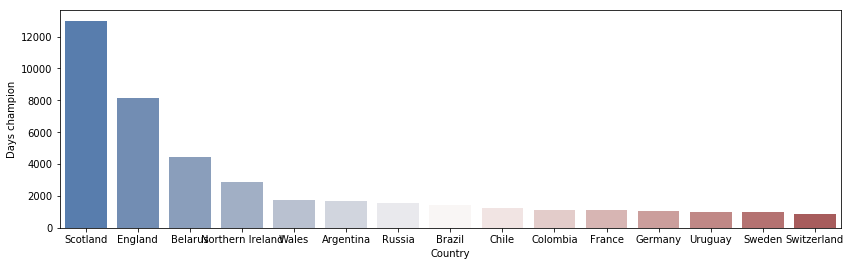

In [12]:
top_uc_df = countries_df.sort_values('Days champion', ascending = False)[:15]
plt.figure(figsize = (14,4))
sns.barplot(x=top_uc_df['Country'], y=top_uc_df['Days champion'], palette="vlag")

We see the domination of **United Kingdom** - and particularly **Scotland**, which is historically the *longest Unofficial Champion* with its four teams being in the top 5 of the longest champions!

Portugal has only 495 days of domination, France 1096 and Brazil 1436.

Here, I had difficulties to plot a timeline representing the order of the Unofficial World Champions. In the following Gantt chart, we can however see the variety of teams which were unofficial champions, and how quick the title can be given from one team to another.

In [13]:
df_timeline = []
for i in range(len(champions) - 1):
    df_timeline.append(dict(Task = champions[i], Start=dates[i], Finish=dates[i + 1]))
df_timeline.append(dict(Task = champions[-1], Start=dates[-1], Finish=datetime.now()))
fig = ff.create_gantt(df_timeline, group_tasks=True, title='Gantt Chart of the Unofficial World Champion')
fig.show()

See how the United Kingdom teams have dominated the first 60 years of this sport? Also, congratulations to **Belarus** with the longest domination, **4434** days, or more than 12 years!

In [14]:
games[(games['Winner'] == 'Belarus') & (games['date'] >= '1967-06-04') & (games['date'] <= '1979-07-25')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Year,Month,Day,Date
6499,1967-06-04,Belarus,Mexico,2,1,Friendly,Minsk,Soviet Union,False,Belarus,Mexico,1967,6,4,1967-06-04
10902,1979-07-21,Belarus,Armenia,3,0,Friendly,Minsk,Soviet Union,False,Belarus,Armenia,1979,7,21,1979-07-21
10905,1979-07-23,Belarus,Latvia,2,1,Friendly,Minsk,Soviet Union,False,Belarus,Latvia,1979,7,23,1979-07-23


Oh ...

They have only played 3 games during this period ! Obviously, this is the main disadvantage of such a ranking, not mentioning its "simplicity" ...

## Ranking II - *Joga Bonito* Champion
<a id='ranking-2'></a>
For this ranking, I will see which teams have better stats, only taking into account the scores of each game.

In [15]:
def make_stats_df(df):
    my_columns =  ['Wins', 'Draws', 'Loses', 'Total games', 'Goals scored', 'Goals taken', 
                   'Goals difference', 'World Cup games', 'World Cup wins']
    data_df = pd.DataFrame(0, index = df['home_team'].append(df['away_team']).unique(), columns = my_columns)
    
    for i in range(len(df)):
        if df.iloc[i]['Winner'] == 'Draw':
            data_df.loc[df.iloc[i]['home_team']]['Draws'] += 1
            data_df.loc[df.iloc[i]['away_team']]['Draws'] += 1
        else:
            data_df.loc[df.iloc[i]['Winner']]['Wins'] += 1
            data_df.loc[df.iloc[i]['Loser']]['Loses'] += 1
        if df.iloc[i]['tournament'] == 'FIFA World Cup':
            data_df.loc[df.iloc[i]['home_team']]['World Cup games'] += 1
            data_df.loc[df.iloc[i]['away_team']]['World Cup games'] += 1
            if df.iloc[i]['Winner'] != 'Draw':
                data_df.loc[df.iloc[i]['Winner']]['World Cup wins'] += 1
        data_df.loc[df.iloc[i]['home_team']]['Goals scored'] += df.iloc[i]['home_score']
        data_df.loc[df.iloc[i]['home_team']]['Goals taken'] += df.iloc[i]['away_score']
        data_df.loc[df.iloc[i]['away_team']]['Goals scored'] += df.iloc[i]['away_score']
        data_df.loc[df.iloc[i]['away_team']]['Goals taken'] += df.iloc[i]['home_score']

    data_df['Total games'] = data_df['Wins'] + data_df['Draws'] + data_df['Loses']
    data_df['Goals difference'] = data_df['Goals scored'] - data_df['Goals taken']
    data_df['Winning rate'] = data_df['Wins'] / data_df['Total games']
    data_df['Goals per game'] = data_df['Goals scored'] / data_df['Total games']
    data_df['Average difference'] = data_df['Goals difference'] / data_df['Total games']
    data_df['WC Winning rate'] = data_df['World Cup wins'] / data_df['World Cup games']
    return data_df

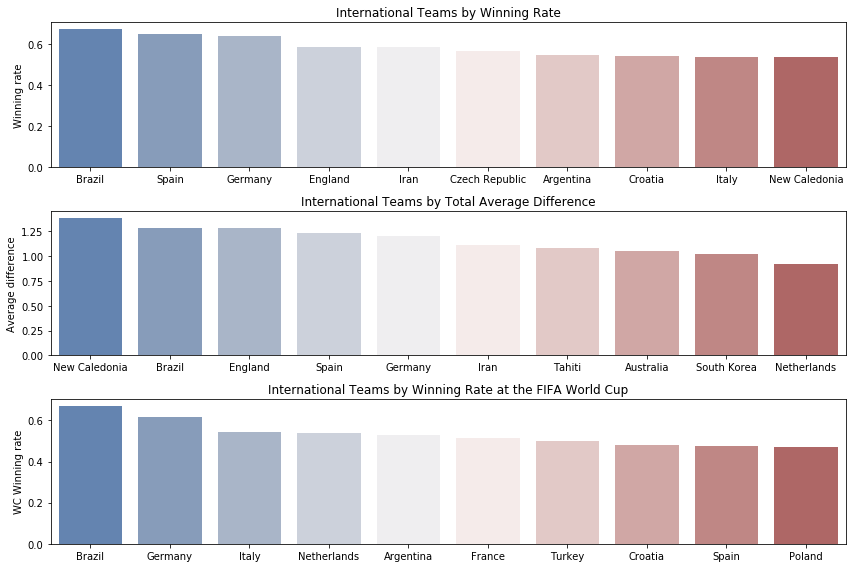

In [16]:
data_df = make_stats_df(games)

plt.figure(figsize = (12,8))
plt.subplot(311)
plt.title('International Teams by Winning Rate')
sns.barplot(x = data_df[data_df['Total games'] >= 100].sort_values('Winning rate', ascending = False).head(10).index, y = data_df[data_df['Total games'] >= 50].sort_values('Winning rate', ascending = False).head(10)['Winning rate'], palette="vlag")
plt.subplot(312)
plt.title('International Teams by Total Average Difference')
sns.barplot(x = data_df[data_df['Total games'] >= 100].sort_values('Average difference', ascending = False).head(10).index, y = data_df[data_df['Total games'] >= 50].sort_values('Average difference', ascending = False).head(10)['Average difference'], palette="vlag")
plt.subplot(313)
plt.title('International Teams by Winning Rate at the FIFA World Cup')
sns.barplot(x = data_df[data_df['World Cup games'] >= 10].sort_values('WC Winning rate', ascending = False).head(10).index, y = data_df[data_df['World Cup games'] >= 10].sort_values('WC Winning rate', ascending = False).head(10)['WC Winning rate'], palette="vlag")
plt.tight_layout()

The last ranking seems to be the more accurate one, but the fact that it only relies on World Cup Games is a potential bias, some teams are excluded, others have only played a small number of games ...

Here are two other rankings, only taking into account games of *modern football*. I chose the 7th July, 1957 to be the first day of this area, which corresponds to the first international game of Pelé with Brazil. I also excluded friendly games, as teams could sometimes make less effort or try original strategies there.

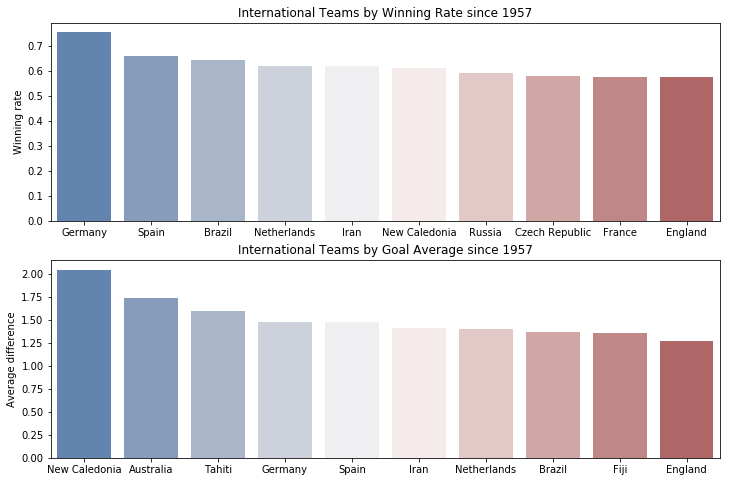

In [17]:
modern_data = make_stats_df(games[(games['Date'] >= pd.to_datetime('07-07-1957')) & (games['tournament'] != 'Friendly')])

plt.figure(figsize = (12,8))
plt.subplot(211)
plt.title('International Teams by Winning Rate since 1957')
sns.barplot(x = modern_data[modern_data['Total games'] >= 100].sort_values('Winning rate', ascending = False).head(10).index, y = modern_data[modern_data['Total games'] >= 50].sort_values('Winning rate', ascending = False).head(10)['Winning rate'], palette="vlag")
plt.subplot(212)
plt.title('International Teams by Goal Average since 1957')
sns.barplot(x = modern_data[modern_data['Total games'] >= 100].sort_values('Average difference', ascending = False).head(10).index, y = modern_data[modern_data['Total games'] >= 50].sort_values('Average difference', ascending = False).head(10)['Average difference'], palette="vlag")

We observe some teams that we aren't used to see in international top rankings (New Caledonia, Iran, Fiji). We could deduce that the regional games have a huge impact on that ranking, but not taking them into account would eliminate some teams which don't play international tournaments. Thus, this ranking should be interpreted with caution. We can however see some clear indicators of the dominance of some teams, such as Germany, Spain or Brazil.

## Ranking III - ELO Ranking
<a id='ranking-3'></a>
[ELO Ranking](https://en.wikipedia.org/wiki/World_Football_Elo_Ratings) is based on the ELO Rating system and could lead to more accurate rankings. 

To compute it, I've separated international games by competitions, distinguishing the major ones and their qualification tournaments from the other games. I'm not sure of the calculations, and I think some data is missing in the dataset (particularly the Olympic Games, which is a major competition), thus leading to some differences with the Wikipedia ranking, but the rankings I have obtained look reliable.

In [18]:
all_teams = games['home_team'].append(games['away_team']).unique()
elo_df = pd.DataFrame(0, index = all_teams, columns= range(1870,2020))

major_comp = ['UEFA Euro', 'African Cup of Nations', 'Copa América', 'AFC Asian Cup', 'UEFA Nations League',
              'Confederations Cup', 'African Nations Championship', 'CONCACAF Championship', 'Gold Cup',
             'Pan American Championship', 'Pacific Games', 'Oceania Nations Cup']
qualif = ['Copa América qualification', 'AFC Asian Cup qualification', 'UEFA Euro qualification', 
          'African Cup of Nations qualification', 'FIFA World Cup qualification', 'CONCACAF Championship qualification',
          'Gold Cup qualification', 'Oceania Nations Cup qualification']

def def_k(comp):
    if comp == 'FIFA World Cup':
        return 60
    elif comp in major_comp:
        return 50
    elif comp in qualif:
        return 40
    elif comp == 'Friendly':
        return 20
    else:
        return 30

def def_g(team_goals, enemy_goals):
    if team_goals - enemy_goals <= 1:
        return 1
    elif team_goals - enemy_goals == 2:
        return 3/2
    elif team_goals - enemy_goals == 3:
        return 7/4
    else:
        return 7/4 + (team_goals - enemy_goals - 3)/8

def def_w(team, winner):
    if team == winner:
        return 1
    elif winner == 'Draw':
        return 1/2
    else:
        return 0
    
def def_dr(team_elo, enemy_elo, neutral):
    if neutral:
        return team_elo - enemy_elo
    else: 
        return team_elo - enemy_elo + 100

for year in range(1871, 2020):
    elo_df[year] = elo_df[year - 1]
    for game in games[games['Year'] == year].values:
        game_series = pd.Series(game, index = games.columns)
        elo_df.loc[game_series['home_team'], year] += def_k(game_series['tournament']) * def_g(game_series['home_score'], game_series['away_score']) * (def_w(game_series['home_team'], game_series['Winner']) - 1/(10 **(- def_dr(elo_df.loc[game_series['home_team']][year], elo_df.loc[game_series['away_team']][year], game_series['neutral']) / 400) + 1))
        elo_df.loc[game_series['away_team'], year] += def_k(game_series['tournament']) * def_g(game_series['away_score'], game_series['home_score']) * (def_w(game_series['away_team'], game_series['Winner']) - 1/(10 **(- def_dr(elo_df.loc[game_series['away_team']][year], elo_df.loc[game_series['home_team']][year], True) / 400) + 1))

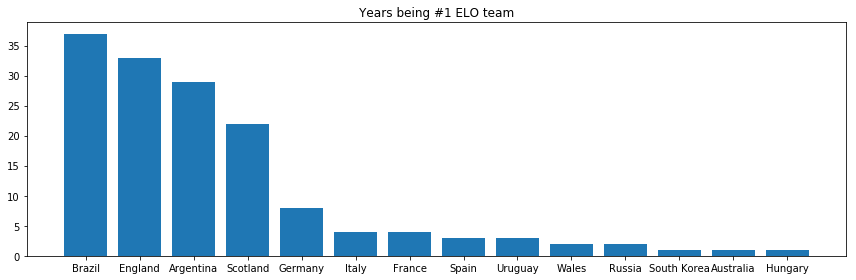

In [19]:
plt.figure(figsize=(12,4))
plt.title('Years being #1 ELO team')
plt.bar(x = elo_df.idxmax().value_counts().index, height = elo_df.idxmax().value_counts().values)
plt.tight_layout()

In [20]:
best_elos = elo_df.loc[elo_df.idxmax().unique()]
fig = go.Figure(layout = dict(title='ELO Ranking of the best international teams'))

for i in range(len(best_elos.values)):
    fig.add_trace(go.Scatter(x = best_elos.columns, 
                             y = best_elos.iloc[i],
                             name = best_elos.index[i]))
fig.show()

Here, I have plotted every team which had once the best ELO score. More than with other rankings, we see how England/Scotland dominated the first half of football history, and Brazil the second one.

As a conclusion for those rankings,  the ELO one is the most adapted to determine the real level of a team. The statistics-based ranking gives us some good indicators, but it should be interpreted with caution, and the Unofficial World Champion one is more fun than accurate.

In the modern era (1957-Today), it is clear that Brazil has dominated the football world, from this analysis it is the best international football team. Some other teams can also be cited because of their high rankings, such as Germany, Spain or France.

# Some interesting facts
<a id = 'facts'></a>
Here are some additional fun facts that I've extracted from the international games dataset.

Let's start with the teams having the lowest winning rate:

In [21]:
data_df[data_df['Total games'] >= 150].sort_values('Winning rate').head(10)

,Wins,Draws,Loses,Total games,Goals scored,Goals taken,Goals difference,World Cup games,World Cup wins,Winning rate,Goals per game,Average difference,WC Winning rate
San Marino,1,4,158,163,24,710,-686,0,0,0.006135,0.147239,-4.208589,NaN
Andorra,6,19,139,164,45,426,-381,0,0,0.036585,0.274390,-2.323171,NaN
Liechtenstein,15,25,158,198,87,565,-478,0,0,0.075758,0.439394,-2.414141,NaN
Luxembourg,34,51,317,402,244,1096,-852,0,0,0.084577,0.606965,-2.119403,NaN
Malta,47,67,283,397,241,918,-677,0,0,0.118388,0.607053,-1.705290,NaN
Nicaragua,27,13,115,155,136,443,-307,0,0,0.174194,0.877419,-1.980645,NaN
Mauritania,37,55,120,212,155,334,-179,0,0,0.174528,0.731132,-0.844340,NaN
Faroe Islands,40,23,161,224,182,551,-369,0,0,0.178571,0.812500,-1.647321,NaN
Lesotho,45,79,124,248,203,390,-187,0,0,0.181452,0.818548,-0.754032,NaN
Laos,31,26,106,163,169,515,-346,0,0,0.190184,1.036810,-2.122699,NaN


In [22]:
# The only win of San Marino, out of 163 games !
games[games['Winner'] == 'San Marino']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Year,Month,Day,Date
26457,2004-04-28,San Marino,Liechtenstein,1,0,Friendly,Serravalle,San Marino,False,San Marino,Liechtenstein,2004,4,28,2004-04-28


In [23]:
# The game with the highest number of goals
games[(games['home_score'] + games['away_score']) == (games['home_score'] + games['away_score']).max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Year,Month,Day,Date
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,Australia,American Samoa,2001,4,11,2001-04-11


For the next DataFrame, I was wondering which country were "worst enemies", ie. the country that has most beaten another one.

In [24]:
all_teams = games['Loser'].unique() #Only teams which have lost a game
enemys_df = pd.DataFrame('', index = all_teams[1:], columns = ['Worst enemy'])
for country in all_teams[1:]: #We don't take 'Draw'
    enemys_df.loc[country]['Worst enemy'] = games[games['Loser'] == country]['Winner'].value_counts().index[0]
enemys_df['Worst enemy'].value_counts().head(10)

Padania                11
South Korea            10
Trinidad and Tobago     7
Argentina               6
Uganda                  6
Jersey                  6
Northern Cyprus         6
Tahiti                  5
Germany                 5
Malaysia                5
Name: Worst enemy, dtype: int64

If we exclude Padania (North of Italy), which doesn't correspond to a country, South Korea team is the worst enemy of 10 other countries ! Let's see which is the worst enemy of the teams that once were #1 in the ELO ranking:

In [25]:
enemys_df.loc[best_elos.index]

,Worst enemy
Scotland,England
Wales,England
England,Scotland
Uruguay,Argentina
Argentina,Uruguay
Italy,Austria
Hungary,Austria
Brazil,Argentina
Germany,Italy
South Korea,Japan


We can see that some "hate" between teams is here highlighted, such as the one between France and Belgium, or between Brazil and Argentina!

To conclude this study, let's look at the longest winning streaks for each team in the dataset, starting with strict winning streaks (ie no draws):

In [26]:
#We exclude teams that haven't win a single game
win_streaks = pd.DataFrame('', index = games['Winner'].unique()[1:], columns = ['Longest streak', 'Start of the streak', 'End of the streak', 'End of streak opponent'])
for team in games['Winner'].unique()[1:]:
    team_games = games[(games['home_team'] == team) | (games['away_team'] == team)]
    team_games['won'] = (team_games['Winner'] == team).apply(int)
    team_games['series'] = (team_games['won'] != team_games['won'].shift()).cumsum()
    team_games['streak'] = team_games.groupby(['won', 'series']).cumcount() + 1
    team_games.loc[team_games['won'] == 0, 'streak'] = 0
    #Find longest streak
    win_streaks.loc[team, 'Longest streak'] = team_games['streak'].max()
    last_win = team_games.loc[team_games['streak'].idxmax()]
    win_streaks.loc[team, 'Start of the streak'] = team_games.loc[(team_games['series'] == last_win['series']) & (team_games['streak'] == 1),'Date'].values[0]
    if team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values.size == 0:
        win_streaks.loc[team, 'End of the streak'] = 'Currently on streak'
        win_streaks.loc[team, 'End of streak opponent'] = 'NA'
    else:
        win_streaks.loc[team, 'End of the streak'] = team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values[0]
        win_streaks.loc[team, 'End of streak opponent'] = team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Winner'].values[0]

In [27]:
win_streaks.sort_values(by= 'Longest streak', ascending = False).head(10)

,Longest streak,Start of the streak,End of the streak,End of streak opponent
Mauritius,17,1947-02-15T00:00:00.000000000,1955-07-14T00:00:00.000000000,Madagascar
Padania,15,2008-07-08T00:00:00.000000000,2014-06-04T00:00:00.000000000,County of Nice
Spain,15,2008-06-26T00:00:00.000000000,2009-06-24T00:00:00.000000000,United States
Brazil,14,1997-06-10T00:00:00.000000000,1997-12-14T00:00:00.000000000,Draw
France,14,2003-03-29T00:00:00.000000000,2004-03-31T00:00:00.000000000,Draw
Scotland,13,1879-04-07T00:00:00.000000000,1885-03-21T00:00:00.000000000,Draw
Mexico,13,1987-01-13T00:00:00.000000000,1990-05-13T00:00:00.000000000,Canada
Guyana,13,2005-09-30T00:00:00.000000000,2007-01-18T00:00:00.000000000,Draw
Australia,13,1996-10-27T00:00:00.000000000,1997-11-22T00:00:00.000000000,Draw
Russia,12,1995-04-26T00:00:00.000000000,1996-04-24T00:00:00.000000000,Draw


Congratulations to Mauritius, with 17 wins in a row from 1947 to 1955. Let's also note the impressive series of Spain, France and Brazil, at a time when each of this teams dominated the worldwide football. At a local level, Padania (North of Italy) also had a very long streak from 2008 to 2014.

However, this table doesn't seem to show which were the best teams, having local teams (Padania, Guyana) and teams winning a lot of game at a regional scale (Mauritius, Australia, ...). Let's now look at the invincibility streaks, to see if we can get some interesting insights:

In [28]:
invincibility_streaks = pd.DataFrame('', index = games['Winner'].unique()[1:], columns = ['Longest streak', 'Start of the streak', 'End of the streak', 'End of streak opponent'])
for team in games['Winner'].unique()[1:]:
    team_games = games[(games['home_team'] == team) | (games['away_team'] == team)]
    #Only the following condition changes
    team_games['won'] = (team_games['Loser'] != team).apply(int)
    team_games['series'] = (team_games['won'] != team_games['won'].shift()).cumsum()
    team_games['streak'] = team_games.groupby(['won', 'series']).cumcount() + 1
    team_games.loc[team_games['won'] == 0, 'streak'] = 0
    #Find longest streak
    invincibility_streaks.loc[team, 'Longest streak'] = team_games['streak'].max()
    last_win = team_games.loc[team_games['streak'].idxmax()]
    invincibility_streaks.loc[team, 'Start of the streak'] = team_games.loc[(team_games['series'] == last_win['series']) & (team_games['streak'] == 1),'Date'].values[0]
    if team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values.size == 0:
        invincibility_streaks.loc[team, 'End of the streak'] = 'Currently on streak'
        invincibility_streaks.loc[team, 'End of streak opponent'] = 'NA'
    else:
        invincibility_streaks.loc[team, 'End of the streak'] = team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values[0]
        invincibility_streaks.loc[team, 'End of streak opponent'] = team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Winner'].values[0]

In [29]:
invincibility_streaks.sort_values(by= 'Longest streak', ascending = False).head(10)

,Longest streak,Start of the streak,End of the streak,End of streak opponent
Spain,35,2007-02-07T00:00:00.000000000,2009-06-24T00:00:00.000000000,United States
Brazil,34,1993-12-16T00:00:00.000000000,1996-01-21T00:00:00.000000000,Mexico
Argentina,30,1991-02-19T00:00:00.000000000,1993-08-15T00:00:00.000000000,Colombia
Senegal,29,2015-10-24T00:00:00.000000000,2018-06-08T00:00:00.000000000,Croatia
France,28,1994-02-16T00:00:00.000000000,1996-11-09T00:00:00.000000000,Denmark
Morocco,27,1974-02-22T00:00:00.000000000,1977-05-28T00:00:00.000000000,Senegal
South Korea,26,2008-02-06T00:00:00.000000000,2009-11-18T00:00:00.000000000,Serbia
Ivory Coast,26,2011-02-08T00:00:00.000000000,2013-02-03T00:00:00.000000000,Nigeria
Colombia,26,1992-07-31T00:00:00.000000000,1994-04-07T00:00:00.000000000,Bolivia
China PR,25,1966-12-06T00:00:00.000000000,1975-06-26T00:00:00.000000000,North Korea


This ranking represents with a higher accuracy the domination periods of the worldwide, or regional football. We see how Spain has dominated football in the late 2000's (let's note that a European Championship took place during this streak!), and Brazil in the mid 90's (winning a World Cup during this streak). We can eventually note that the streak killer team is rarely a top team, but rather an intermediate one. 

We can show these streaks on a map:

In [30]:
invincibility_streaks['Country'] = invincibility_streaks.index
invincibility_streaks['Code'] = invincibility_streaks['Country'].apply(return_country_code)
invincibility_streaks.head()

,Longest streak,Start of the streak,End of the streak,End of streak opponent,Country,Code
England,20,1890-03-15T00:00:00.000000000,1896-04-04T00:00:00.000000000,Scotland,England,None
Scotland,22,1879-04-07T00:00:00.000000000,1888-03-17T00:00:00.000000000,England,Scotland,None
Wales,10,2001-10-06T00:00:00.000000000,2003-05-26T00:00:00.000000000,United States,Wales,None
Canada,15,1999-09-02T00:00:00.000000000,2000-07-16T00:00:00.000000000,Trinidad and Tobago,Canada,CAN
United States,16,2004-03-13T00:00:00.000000000,2005-03-27T00:00:00.000000000,Mexico,United States,USA


In [31]:
invincibility_streaks['text'] = invincibility_streaks['Start of the streak'].apply(pd.to_datetime).apply(str) + ' - ' + invincibility_streaks['End of the streak'].apply(str)
data=dict(
    type = 'choropleth',
    locations = invincibility_streaks['Code'],
    z = invincibility_streaks['Longest streak'],
    text = invincibility_streaks['text'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '#games during longest streak',
)

layout = dict(title_text='The Longest Streaks of Invincibility per country',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

That's it for this notebook, I plan to add new graphs and stats as soon as I have more ideas !!